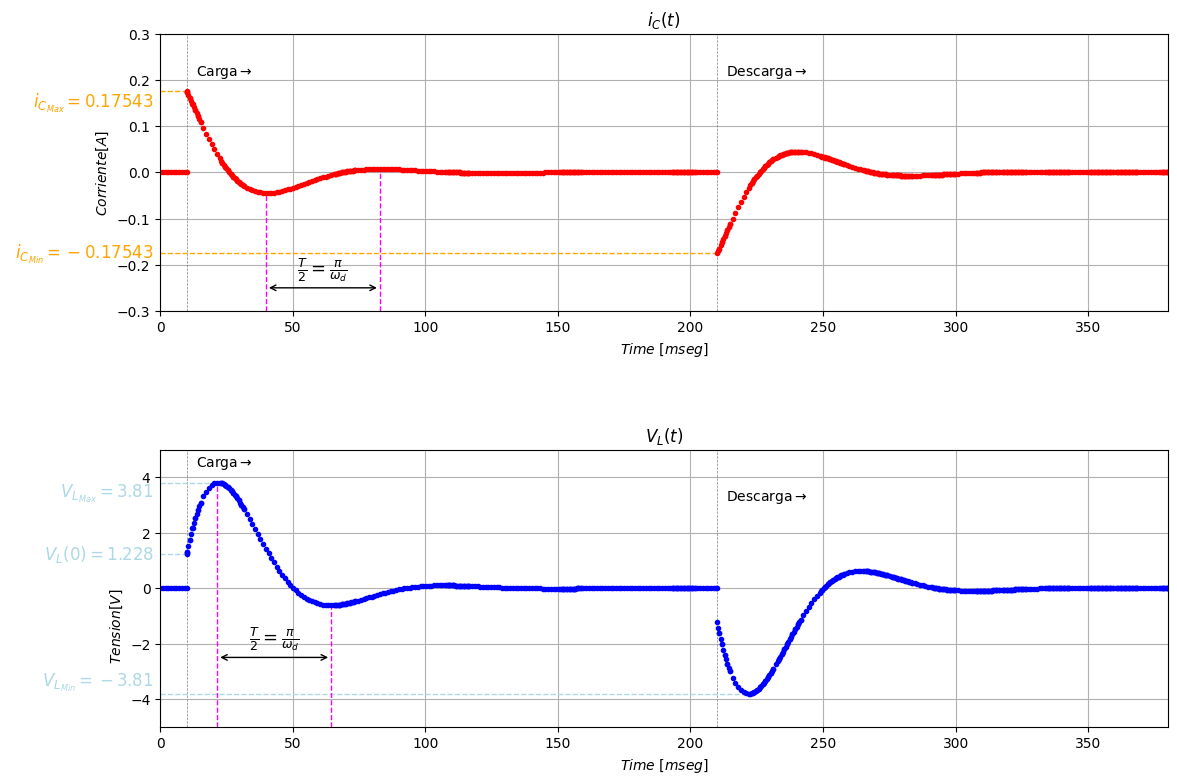

In [19]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os


OMEGA_D = 73.84
ALPHA = 0.19
OMEGA = 85.31
XI = 0.5

# ----------------------------     Graficos del circuito con valores fijos     --------------------------------------


#------------Load the signals from the .raw file
raw_file = 'Simulacion_con_valores_Fijos\\Simulacion_SPICE_Valores_Fijos.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

#----------------------------Obtain basic signals
time = l.get_time()
time = (time) * 1E+3         
Vcc = l.get_data('V(vcc)')
Vlplus = l.get_data('V(vl+)')
Vlminus = l.get_data('V(vl-)')
Vl = Vlplus - Vlminus

ic = l.get_data('I(C1)')
id = l.get_data('I(V1)')
#------------------------------------------------

chargeTime = np.linspace(0, 200, 1000)
dischargeTime = np.linspace(200, 400, 1000)


#Set max and min Voltages and currents
V_upper_limit = 5
V_lower_limit = -5
I_upper_limit = 0.3
I_lower_limit = -0.3

fig = plt.figure(figsize=(13, 9))
fig.subplots_adjust(hspace=0.5)

#Current plot
plt.subplot(2, 1, 1)
plt.title("$i_C(t)$")       #title
plt.xlabel("$Time\ [m seg]$")
plt.ylabel("$Corriente [A]$")
plt.axvline(x = 210, linestyle='--', linewidth = 0.5,color='grey')
plt.text(210, 0.2, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.axvline(x = 10, linestyle='--', linewidth = 0.5,color='grey')
plt.text(10, 0.2, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.plot([time[0], 10], [0.17543, 0.17543], linestyle = '--', linewidth = 1,  color = 'orange')
plt.text(0, 0.17543, r" $i_{C_{Max}} = 0.17543 $  ", ha='right', va='top', rotation='horizontal', color = 'orange', fontsize = 12)
plt.plot([time[0], 210], [-0.17543, -0.17543], linestyle = '--', linewidth = 1,  color = 'orange')
plt.text(0, - 0.17543, r" $i_{C_{Min}} = -0.17543 $  ", ha='right', va='center', rotation='horizontal', color = 'orange', fontsize = 12)
plt.plot([39.944521, 39.944521], [-0.3, -0.044715881], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([82.801664, 82.801664], [-0.3, 0.0072638779], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.annotate("", xy=(39.944521, -0.25), xytext=(82.801664, -0.25), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(39.944521+82.801664), -0.25), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
plt.xlim(0, 380)
plt.ylim(I_lower_limit, I_upper_limit)
plt.grid()

plt.plot(time , ic, 'r.')

#Voltage plot
plt.subplot(2, 1, 2)
plt.title("$V_L(t)$")
plt.xlabel("$Time\ [m seg]$")
plt.ylabel("$Tension [V]$", ha = 'right')
plt.axvline(x = 210, linestyle='--', linewidth = 0.5,color='grey')
plt.text(210, 3, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.axvline(x = 10, linestyle='--', linewidth = 0.5,color='grey')
plt.text(10, 4.2, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.plot([time[0], 21.555403], [3.8061319, 3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, 3.8061319, r" $V_{L_{Max}} = 3.81 $  ", ha='right', va='top', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([time[0], 10], [1.228, 1.228], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, 1.228, r" $V_{L}(0) = 1.228 $  ", ha='right', va='center', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([time[0], 21.555403 + 200], [-3.8061319, -3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, -3.8061319, r" $V_{L_{Min}} = -3.81 $  ", ha='right', va='bottom', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([21.555403, 21.555403], [-5, 3.8061319], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([64.418445, 64.418445], [-5, -0.61818752], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.annotate("", xy=(21.555403, -2.5), xytext=(64.418445, -2.5), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(21.555403+64.418445), -2.5), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
plt.xlim(0, 380)
plt.ylim(V_lower_limit, V_upper_limit)
plt.grid()

plt.plot(time , Vl, 'b.')
#plt.savefig('Graficos circuito valores fijos.pdf', format='pdf')
plt.show()



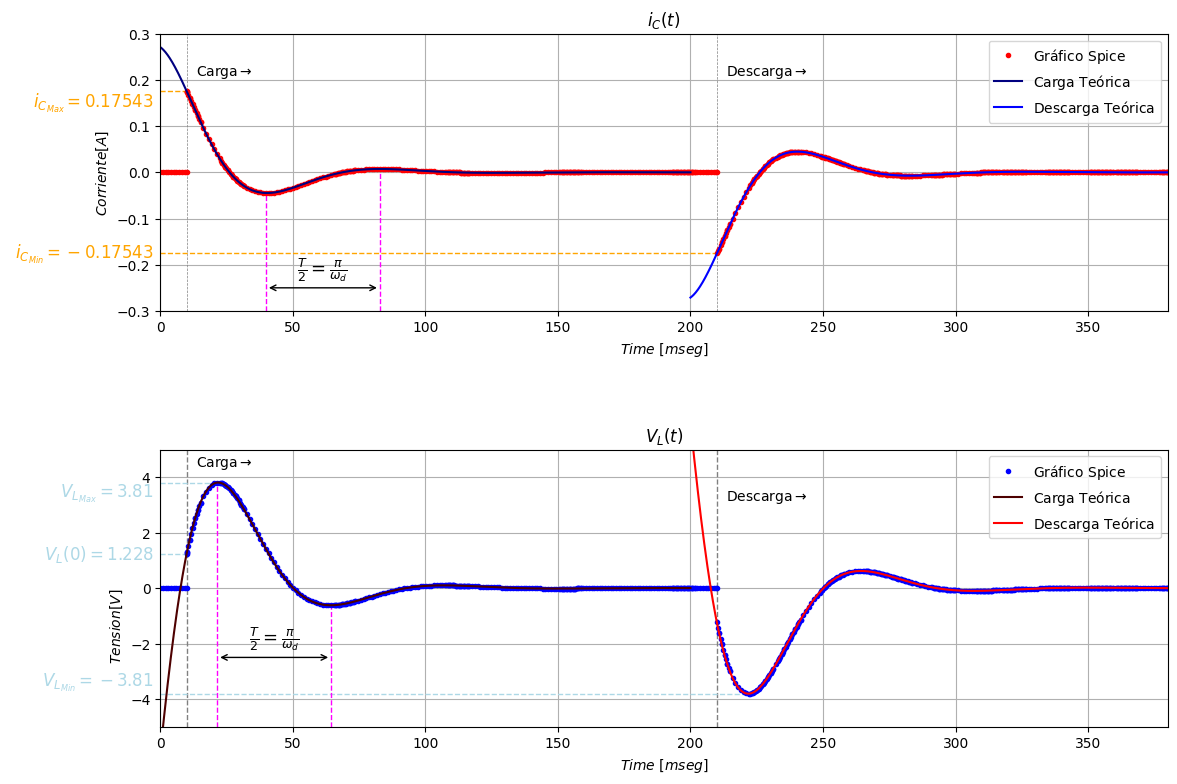

In [20]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os


OMEGA_D = 73.84
ALPHA = 42.73
OMEGA = 85.31
XI = 0.5
L = 0.45
C = 300E-6

# ----------------------------     Graficos del circuito con valores fijos     --------------------------------------


#------------Load the signals from the .raw file
raw_file = 'Simulacion_con_valores_Fijos\\Simulacion_SPICE_Valores_Fijos.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

#----------------------------Obtain basic signals
time = l.get_time()
time = (time) * 1E+3         
Vcc = l.get_data('V(vcc)')
Vlplus = l.get_data('V(vl+)')
Vlminus = l.get_data('V(vl-)')
Vl = Vlplus - Vlminus

ic = l.get_data('I(C1)')
id = l.get_data('I(V1)')
#------------------------------------------------

chargeTime = np.linspace(0, 200, 1000)
dischargeTime = np.linspace(200, 400, 1000)


#Set max and min Voltages and currents
V_upper_limit = 5
V_lower_limit = -5
I_upper_limit = 0.3
I_lower_limit = -0.3

fig = plt.figure(figsize=(13, 9))
fig.subplots_adjust(hspace=0.5)


#tension de carga de la bobina
Vltc = - 0.19 * L * np.exp(-ALPHA * (chargeTime -10) * 1E-3) * ( ALPHA * np.cos( OMEGA_D * (chargeTime -10) * 1E-3 + 2.79) + OMEGA_D * np.sin( OMEGA_D * (chargeTime -10) * 1E-3 + 2.79))
#tension de descarga de la bobina
Vltd = 0.19 * L * np.exp(-ALPHA * (dischargeTime - 210) * 1E-3) * ( ALPHA * np.cos( OMEGA_D * (dischargeTime - 210) * 1E-3 + 2.79) + OMEGA_D * np.sin( OMEGA_D * (dischargeTime - 210) * 1E-3 + 2.79))

#Corriente de carga del capacitor
ictc = - 7.38  * C * np.exp(-ALPHA * (chargeTime -10) * 1E-3) * ( ALPHA * np.cos( OMEGA_D * (chargeTime -10) * 1E-3 + 4.567) + OMEGA_D * np.sin( OMEGA_D * (chargeTime -10) * 1E-3 + 4.567))
#Corriente de descarga del capacitor
ictd = 7.38  * C * np.exp(-ALPHA * (dischargeTime - 210) * 1E-3) * ( ALPHA * np.cos( OMEGA_D * (dischargeTime - 210) * 1E-3 + 4.567) + OMEGA_D * np.sin( OMEGA_D * (dischargeTime - 210) * 1E-3 + 4.567))



#Current plot
plt.subplot(2, 1, 1)
plt.title("$i_C(t)$")       #title
plt.xlabel("$Time\ [m seg]$")
plt.ylabel("$Corriente [A]$")
plt.axvline(x = 210, linestyle='--', linewidth = 0.5,color='grey')
plt.text(210, 0.2, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.axvline(x = 10, linestyle='--', linewidth = 0.5,color='grey')
plt.text(10, 0.2, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.plot([time[0], 10], [0.17543, 0.17543], linestyle = '--', linewidth = 1,  color = 'orange')
plt.text(0, 0.17543, r" $i_{C_{Max}} = 0.17543 $  ", ha='right', va='top', rotation='horizontal', color = 'orange', fontsize = 12)
plt.plot([time[0], 210], [-0.17543, -0.17543], linestyle = '--', linewidth = 1,  color = 'orange')
plt.text(0, - 0.17543, r" $i_{C_{Min}} = -0.17543 $  ", ha='right', va='center', rotation='horizontal', color = 'orange', fontsize = 12)
plt.plot([39.944521, 39.944521], [-0.3, -0.044715881], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([82.801664, 82.801664], [-0.3, 0.0072638779], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.annotate("", xy=(39.944521, -0.25), xytext=(82.801664, -0.25), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(39.944521+82.801664), -0.25), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
plt.xlim(0, 380)
plt.ylim(I_lower_limit, I_upper_limit)
plt.grid()

plt.plot(time , ic, 'r.', label = '$ \mathrm{Gráfico \ Spice} $')                           
plt.plot(chargeTime , ictc, color = (0,0, 0.5), label = '$ \mathrm{Carga \ Teórica} $')     
plt.plot(dischargeTime , ictd, color = (0,0, 1), label = '$ \mathrm{Descarga \ Teórica} $')    
plt.legend()

#Voltage plot
plt.subplot(2, 1, 2)
plt.title("$V_L(t)$")
plt.xlabel("$Time\ [m seg]$")
plt.ylabel("$Tension [V]$", ha = 'right')
plt.axvline(x = 210, linestyle='--', linewidth = 1,color='grey')
plt.text(210, 3, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.axvline(x = 10, linestyle='--', linewidth = 1,color='grey')
plt.text(10, 4.2, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.plot([time[0], 21.555403], [3.8061319, 3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, 3.8061319, r" $V_{L_{Max}} = 3.81 $  ", ha='right', va='top', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([time[0], 10], [1.228, 1.228], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, 1.228, r" $V_{L}(0) = 1.228 $  ", ha='right', va='center', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([time[0], 21.555403 + 200], [-3.8061319, -3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, -3.8061319, r" $V_{L_{Min}} = -3.81 $  ", ha='right', va='bottom', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([21.555403, 21.555403], [-5, 3.8061319], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([64.418445, 64.418445], [-5, -0.61818752], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.annotate("", xy=(21.555403, -2.5), xytext=(64.418445, -2.5), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(21.555403+64.418445), -2.5), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
plt.xlim(0, 380)
plt.ylim(V_lower_limit, V_upper_limit)
plt.grid()

plt.plot(time , Vl, 'b.', label = '$ \mathrm{Gráfico \ Spice} $')                           
plt.plot(chargeTime , Vltc, color = (0.3,0,0), label = '$ \mathrm{Carga \ Teórica} $')      
plt.plot(dischargeTime , Vltd, color = (1,0,0), label = '$ \mathrm{Descarga \ Teórica} $')     
plt.legend()

#plt.savefig('Graficos teoricos.pdf', format='pdf')

plt.show()

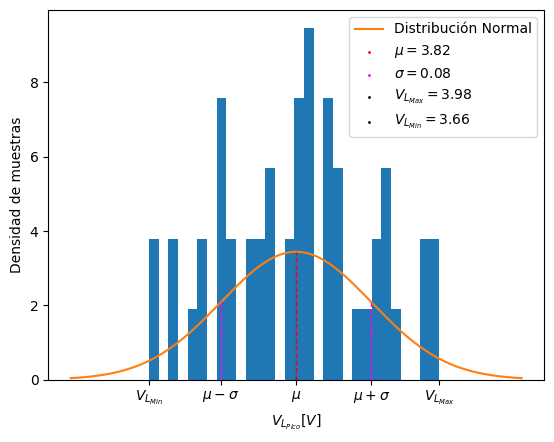

In [3]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

#------------Load the signals from the .raw file
raw_file = 'Montecarlo_R3\\Simulacion_SPICE_Montecarlo_R3.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

time = l.get_time() * 1E+3
Vl = l.get_data('V(vl+)') - l.get_data('V(vl-)')
V_l_max = []
V_l_min = []

for i in range(l.case_count): # Iteration in simulation cases 
    time = l.get_time(i) * 1E+3 
    # Case number starts from zero
    # Each case has different time point numbers
    V_l = l.get_data('V(vl+)',i) - l.get_data('V(vl-)', i) 
    V_l_max.append(max(V_l))
    V_l_min.append(min(V_l))
    #plt.plot(time, V_l)

# Histograma
counts, bins, _ = plt.hist(V_l_max, bins = 30, density = True)

# Calcula la media y la desviación estándar
media = (1/l.case_count) * np.sum(V_l_max)
str_media = "{:.2f}".format(media)
desvio = np.sqrt((1/(l.case_count -1)) * np.sum((V_l_max - media) ** 2))
str_desvio = "{:.2f}".format(desvio)
t = np.linspace(media - desvio * 3, media + desvio * 3, 1000)
dist_normal = (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-(t-media)**2/(2*desvio**2))
plt.plot(t, dist_normal, label = 'Distribución Normal')

# Anotaciones
plt.plot([media, media], [0, (1/(desvio * 2 * np.sqrt(np.pi)))], linestyle = '--', linewidth = 1,  color = 'red')
plt.scatter(media, 0, color='red', s = 1, label='$\mu = $' + str_media)
x_ticks = [media, media + desvio, media - desvio, max(V_l_max), min(V_l_max)]
x_labels = ["$\mu$", "$\mu + \sigma$", "$\mu - \sigma$", "$V_{L_{Max}}$", "$V_{L_{Min}}$"]
plt.xticks(x_ticks, x_labels)
plt.plot([media - desvio, media - desvio], [0, (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-desvio**2/(2*desvio**2))], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([media + desvio, media + desvio], [0, (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-desvio**2/(2*desvio**2))], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.scatter(media, 0, color='magenta', s = 1, label='$\sigma = $' + str_desvio)
plt.scatter(media, 0, color='black', s = 1, label='$V_{L_{Max}} = $' + "{:.2f}".format(max(V_l_max)))
plt.scatter(media, 0, color='black', s = 1, label='$V_{L_{Min}} = $' + "{:.2f}".format(min(V_l_max)))

plt.xlabel("$V_{L_{Pico}} [V]$")
plt.ylabel("Densidad de muestras")

plt.legend()

plt.savefig('Graficos\\Histograma R3 V_L.pdf', format='pdf')

plt.show()


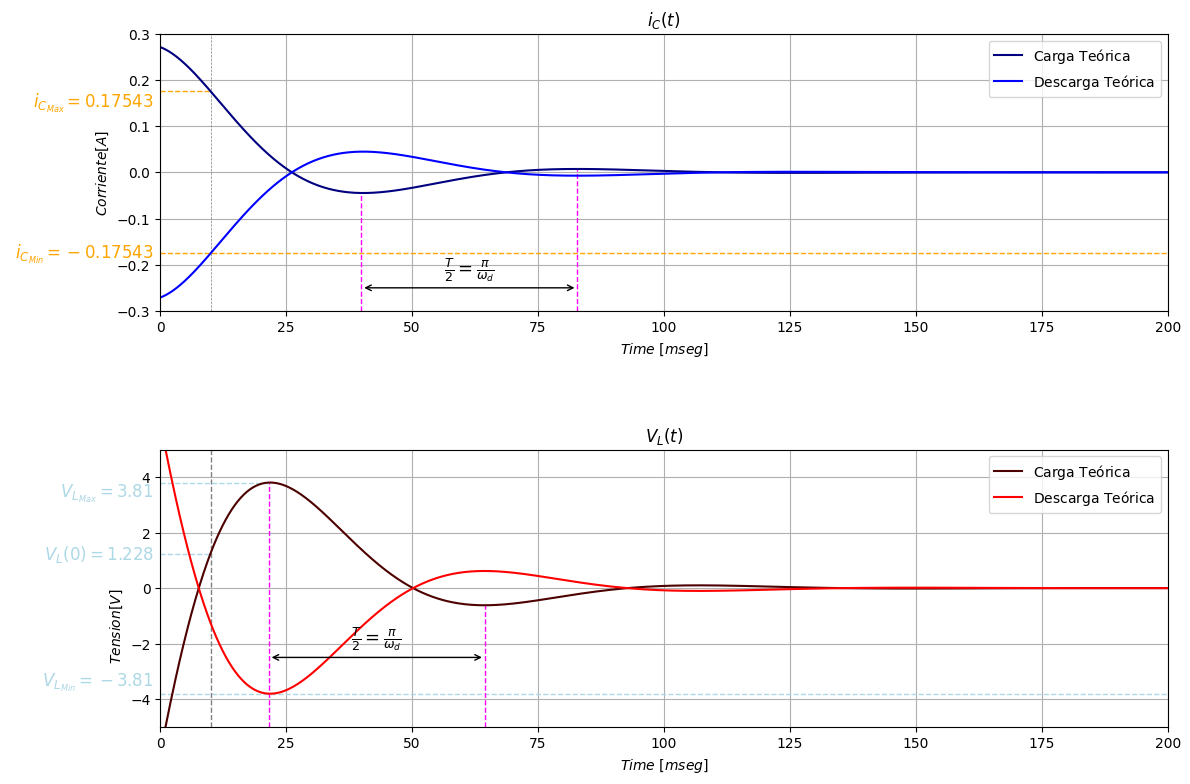

In [36]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os


OMEGA_D = 73.84
ALPHA = 42.73
OMEGA = 85.31
XI = 0.5
L = 0.45
C = 300E-6

# ----------------------------     Graficos del circuito con valores fijos     --------------------------------------


#------------Load the signals from the .raw file
raw_file = 'Simulacion_con_valores_Fijos\\Simulacion_SPICE_Valores_Fijos.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

#----------------------------Obtain basic signals
time = l.get_time()
time = (time) * 1E+3         
Vcc = l.get_data('V(vcc)')
Vlplus = l.get_data('V(vl+)')
Vlminus = l.get_data('V(vl-)')
Vl = Vlplus - Vlminus

ic = l.get_data('I(C1)')
id = l.get_data('I(V1)')
#------------------------------------------------

chargeTime = np.linspace(0, 200, 1000)
dischargeTime = np.linspace(0, 200, 1000)


#Set max and min Voltages and currents
V_upper_limit = 5
V_lower_limit = -5
I_upper_limit = 0.3
I_lower_limit = -0.3

fig = plt.figure(figsize=(13, 9))
fig.subplots_adjust(hspace=0.5)


#tension de carga de la bobina
Vltc = - 0.19 * L * np.exp(-ALPHA * (chargeTime -10) * 1E-3) * ( ALPHA * np.cos( OMEGA_D * (chargeTime -10) * 1E-3 + 2.79) + OMEGA_D * np.sin( OMEGA_D * (chargeTime -10) * 1E-3 + 2.79))
#tension de descarga de la bobina
Vltd = 0.19 * L * np.exp(-ALPHA * (dischargeTime - 10) * 1E-3) * ( ALPHA * np.cos( OMEGA_D * (dischargeTime - 10) * 1E-3 + 2.79) + OMEGA_D * np.sin( OMEGA_D * (dischargeTime - 10) * 1E-3 + 2.79))

#Corriente de carga del capacitor
ictc = - 7.38  * C * np.exp(-ALPHA * (chargeTime -10) * 1E-3) * ( ALPHA * np.cos( OMEGA_D * (chargeTime -10) * 1E-3 + 4.567) + OMEGA_D * np.sin( OMEGA_D * (chargeTime -10) * 1E-3 + 4.567))
#Corriente de descarga del capacitor
ictd = 7.38  * C * np.exp(-ALPHA * (dischargeTime - 10) * 1E-3) * ( ALPHA * np.cos( OMEGA_D * (dischargeTime - 10) * 1E-3 + 4.567) + OMEGA_D * np.sin( OMEGA_D * (dischargeTime - 10) * 1E-3 + 4.567))



#Current plot
plt.subplot(2, 1, 1)
plt.title("$i_C(t)$")       #title
plt.xlabel("$Time\ [m seg]$")
plt.ylabel("$Corriente [A]$")
plt.axvline(x = 210, linestyle='--', linewidth = 0.5,color='grey')
#plt.text(210, 0.2, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.axvline(x = 10, linestyle='--', linewidth = 0.5,color='grey')
#plt.text(10, 0.2, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.plot([time[0], 10], [0.17543, 0.17543], linestyle = '--', linewidth = 1,  color = 'orange')
plt.text(0, 0.17543, r" $i_{C_{Max}} = 0.17543 $  ", ha='right', va='top', rotation='horizontal', color = 'orange', fontsize = 12)
plt.plot([time[0], 210], [-0.17543, -0.17543], linestyle = '--', linewidth = 1,  color = 'orange')
plt.text(0, - 0.17543, r" $i_{C_{Min}} = -0.17543 $  ", ha='right', va='center', rotation='horizontal', color = 'orange', fontsize = 12)
plt.plot([39.944521, 39.944521], [-0.3, -0.044715881], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([82.801664, 82.801664], [-0.3, 0.0072638779], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.annotate("", xy=(39.944521, -0.25), xytext=(82.801664, -0.25), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(39.944521+82.801664), -0.25), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
plt.xlim(0, 200)
plt.ylim(I_lower_limit, I_upper_limit)
plt.grid()

#plt.plot(time , ic, 'r.', label = '$ \mathrm{Gráfico \ Spice} $')                           
plt.plot(chargeTime , ictc, color = (0,0, 0.5), label = '$ \mathrm{Carga \ Teórica} $')     
plt.plot(dischargeTime , ictd, color = (0,0, 1), label = '$ \mathrm{Descarga \ Teórica} $')    
plt.legend()

#Voltage plot
plt.subplot(2, 1, 2)
plt.title("$V_L(t)$")
plt.xlabel("$Time\ [m seg]$")
plt.ylabel("$Tension [V]$", ha = 'right')
plt.axvline(x = 210, linestyle='--', linewidth = 1,color='grey')
#plt.text(210, 3, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.axvline(x = 10, linestyle='--', linewidth = 1,color='grey')
#plt.text(10, 4.2, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.plot([time[0], 21.555403], [3.8061319, 3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, 3.8061319, r" $V_{L_{Max}} = 3.81 $  ", ha='right', va='top', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([time[0], 10], [1.228, 1.228], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, 1.228, r" $V_{L}(0) = 1.228 $  ", ha='right', va='center', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([time[0], 21.555403 + 200], [-3.8061319, -3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, -3.8061319, r" $V_{L_{Min}} = -3.81 $  ", ha='right', va='bottom', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([21.555403, 21.555403], [-5, 3.8061319], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([64.418445, 64.418445], [-5, -0.61818752], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.annotate("", xy=(21.555403, -2.5), xytext=(64.418445, -2.5), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(21.555403+64.418445), -2.5), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
plt.xlim(0, 200)
plt.ylim(V_lower_limit, V_upper_limit)
plt.grid()

#plt.plot(time , Vl, 'b.', label = '$ \mathrm{Gráfico \ Spice} $')                           
plt.plot(chargeTime , Vltc, color = (0.3,0,0), label = '$ \mathrm{Carga \ Teórica} $')      
plt.plot(dischargeTime , Vltd, color = (1,0,0), label = '$ \mathrm{Descarga \ Teórica} $')     
plt.legend()

plt.savefig('Graficos teoricos superpuestos.pdf', format='pdf')

plt.show()

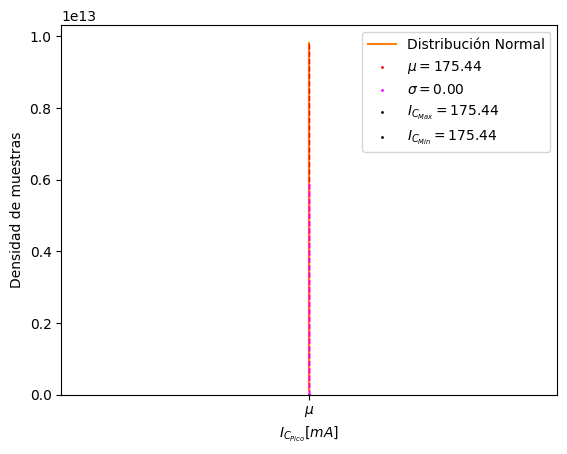

In [29]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

#------------Load the signals from the .raw file
raw_file = 'Montecarlo_Capacitor\\Simulacion_SPICE_Montecarlo_Capacitor.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

time = l.get_time() * 1E+3
I_c_max = []
I_c_min = []

for i in range(l.case_count): # Iteration in simulation cases 
    time = l.get_time(i) * 1E+3 
    # Case number starts from zero
    # Each case has different time point numbers
    I_c = l.get_data('I(C1)',i)
    I_c_max.append(max(I_c)*1E3)
    I_c_min.append(min(I_c)*1E3)
    

# Redondear los valores del arreglo a 2 decimales
I_c_max = np.round(I_c_max, decimals=4)
# Histograma
counts, bins, _ = plt.hist(I_c_max, bins = 30, density = True)

# Calcula la media y la desviación estándar
media = (1/l.case_count) * np.sum(I_c_max)
str_media = "{:.2f}".format(media)
desvio = np.sqrt((1/(l.case_count -1)) * np.sum((I_c_max - media) ** 2))
str_desvio = "{:.2f}".format(desvio)
t = np.linspace(media - desvio * 3, media + desvio * 3, 1000)
dist_normal = (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-(t-media)**2/(2*desvio**2))
plt.plot(t, dist_normal, label = 'Distribución Normal')

# Anotaciones
plt.plot([media, media], [0, (1/(desvio * 2 * np.sqrt(np.pi)))], linestyle = '--', linewidth = 1,  color = 'red')
plt.scatter(media, 0, color='red', s = 1, label='$\mu = $' + str_media)
#x_ticks = [media, media + desvio, media - desvio, max(I_c_max), min(I_c_max)]
#x_labels = ["$\mu$", "$\mu + \sigma$", "$\mu - \sigma$", "$I_{C_{Max}}$", "$I_{C_{Min}}$"]
x_ticks = [media]
x_labels = ["$\mu$"]
plt.xticks(x_ticks, x_labels)
plt.plot([media - desvio, media - desvio], [0, (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-desvio**2/(2*desvio**2))], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([media + desvio, media + desvio], [0, (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-desvio**2/(2*desvio**2))], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.scatter(media, 0, color='magenta', s = 1, label='$\sigma = $' + str_desvio)
plt.scatter(media, 0, color='black', s = 1, label='$I_{C_{Max}} = $' + "{:.2f}".format(max(I_c_max)))
plt.scatter(media, 0, color='black', s = 1, label='$I_{C_{Min}} = $' + "{:.2f}".format(min(I_c_max)))

plt.xlabel("$I_{C_{Pico}} [mA]$")
plt.ylabel("Densidad de muestras")

plt.legend()

plt.savefig('Graficos\\Histograma Capacitor I_C.pdf', format='pdf')

plt.show()

In [ ]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

#------------Load the signals from the .raw file
raw_file = 'Montecarlo_R3\\Simulacion_SPICE_Montecarlo_R3.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

time = l.get_time() * 1E+3
Vl = l.get_data('V(vl+)') - l.get_data('V(vl-)')
V_l_pico = []
V_l_min = []

for i in range(l.case_count): # Iteration in simulation cases 
    time = l.get_time(i) * 1E+3 
    # Case number starts from zero
    # Each case has different time point numbers
    V_l = l.get_data('V(vl+)',i) - l.get_data('V(vl-)', i)
    print(V_l)
    V_l_max.append(V_l)
    V_l_min.append(min(V_l))
    #plt.plot(time, V_l)

# Histograma
counts, bins, _ = plt.hist(V_l_max, bins = 30, density = True)

# Calcula la media y la desviación estándar
media = (1/l.case_count) * np.sum(V_l_max)
str_media = "{:.2f}".format(media)
desvio = np.sqrt((1/(l.case_count -1)) * np.sum((V_l_max - media) ** 2))
str_desvio = "{:.2f}".format(desvio)
t = np.linspace(media - desvio * 3, media + desvio * 3, 1000)
dist_normal = (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-(t-media)**2/(2*desvio**2))
plt.plot(t, dist_normal, label = 'Distribución Normal')

# Anotaciones
plt.plot([media, media], [0, (1/(desvio * 2 * np.sqrt(np.pi)))], linestyle = '--', linewidth = 1,  color = 'red')
plt.scatter(media, 0, color='red', s = 1, label='$\mu = $' + str_media)
x_ticks = [media, media + desvio, media - desvio, max(V_l_max), min(V_l_max)]
x_labels = ["$\mu$", "$\mu + \sigma$", "$\mu - \sigma$", "$V_{L_{Max}}$", "$V_{L_{Min}}$"]
plt.xticks(x_ticks, x_labels)
plt.plot([media - desvio, media - desvio], [0, (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-desvio**2/(2*desvio**2))], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([media + desvio, media + desvio], [0, (1/(desvio * 2 * np.sqrt(np.pi))) * np.exp(-desvio**2/(2*desvio**2))], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.scatter(media, 0, color='magenta', s = 1, label='$\sigma = $' + str_desvio)
plt.scatter(media, 0, color='black', s = 1, label='$V_{L_{Max}} = $' + "{:.2f}".format(max(V_l_max)))
plt.scatter(media, 0, color='black', s = 1, label='$V_{L_{Min}} = $' + "{:.2f}".format(min(V_l_max)))

plt.xlabel("$V_{L_{Pico}} [V]$")
plt.ylabel("Densidad de muestras")

plt.legend()

#plt.savefig('Graficos\\Histograma R3 V_L.pdf', format='pdf')

plt.show()
